Análise de Performance do Vasco da Gama no Campeonato Brasileiro de 2003 até 2019

Analisando o desempenho do Clube de Regatas Vasco da Gama no Campeonato Brasileiro a partir da modalidade de pontos corridos(2003) até 2019.
O dataset utilizado pode ser encontrado para download aqui: https://github.com/thelesson/Colab-Analise-de-Performace-do-Vasco-da-Gama-no-Campeonato-Brasileiro-de-2003-ate-2019
Faça o download do arquivo csv: "campeonato-brasileiro-full.csv" e importe para a raiz do projeto no Colab, acessando o menu vertical esquerdo

***Importando as bibliotecas***

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as rc

**Lendo o cabeçalho do arquivo csv**

In [6]:
df = pd.read_csv("campeonato-brasileiro-full.csv")
df.head()

,Horário,Dia,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor
0,16h00,Sábado,2000-07-29,Fluminense,Bahia,Fluminense,1ª Rodada,Maracanã,2,0,RJ,BA,RJ
1,16h00,Sábado,2000-07-29,Vasco,Sport,Sport,1ª Rodada,São Januário,0,2,RJ,PE,PE
2,16h00,Sábado,2000-07-29,Vitória,Palmeiras,Vitória,1ª Rodada,Barradão,4,1,ES,SP,ES
3,17h00,Domingo,2000-07-30,Botafogo-RJ,Atlético-MG,-,1ª Rodada,Caio Martins,0,0,RJ,MG,Empate
4,18h30,Domingo,2000-07-30,Juventude,Flamengo,-,1ª Rodada,Alfredo Jaconi,1,1,RS,RJ,Empate


**Verificando se os nomes dos clubes estão corretos**

In [7]:
print(df['Clube 1'].unique())

['Fluminense' 'Vasco' 'Vitória' 'Botafogo-RJ' 'Juventude' 'Guarani'
 'Cruzeiro' 'América-MG' 'Goiás' 'Coritiba' 'Bahia' 'Flamengo' 'Gama'
 'Internacional' 'Ponte Preta' 'Santos' 'Palmeiras' 'Athlético-PR'
 'Corinthians' 'Atlético-MG' 'Portuguesa' 'Grêmio' 'São Paulo'
 'Santa Cruz' 'Sport' 'INTERNACIONAL' 'Paraná' 'REMO' 'São Caetano'
 'MALUTROM' 'PALMEIRAS' 'BAHIA' 'CRUZEIRO' 'PONTE PRETA' 'FLUMINENSE'
 'SPORT' 'VASCO' 'Botafogo-SP' 'Figueirense' 'Paysandu' 'SANTOS'
 'CORINTHIANS' 'JUVENTUDE' 'Fortaleza' 'Criciúma' 'Brasiliense'
 'América-RN' 'Náutico' 'Ipatinga' 'Avaí' 'Santo André' 'Barueri'
 'FLAMENGO' 'Atlético-GO' 'Ceará' 'Grêmio Prudente' 'Chapecoense'
 'Joinville' 'Botafogo-rj' 'CSA']


In [8]:
print(df['Clube 2'].unique())

['Bahia' 'Sport' 'Palmeiras' 'Atlético-MG' 'Flamengo' 'Santa Cruz'
 'Athlético-PR' 'Gama' 'Corinthians' 'Grêmio' 'Fluminense' 'Goiás'
 'América-MG' 'Vitória' 'Botafogo-RJ' 'Santos' 'Cruzeiro' 'Ponte Preta'
 'Guarani' 'São Paulo' 'Portuguesa' 'Coritiba' 'Internacional' 'Juventude'
 'Vasco' 'SPORT' 'FLUMINENSE' 'CRUZEIRO' 'PONTE PRETA' 'VASCO'
 'INTERNACIONAL' 'Paraná' 'MALUTROM' 'São Caetano' 'REMO' 'BAHIA'
 'PALMEIRAS' 'Botafogo-SP' 'portuguesa' 'Paysandu' 'Figueirense'
 'JUVENTUDE' 'CORINTHIANS' 'SANTOS' 'Fortaleza' 'Criciúma' 'PAYSANDU'
 'Brasiliense' 'Náutico' 'América-RN' 'Ipatinga' 'Barueri' 'Avaí'
 'Santo André' 'Grêmio Prudente' 'Atlético-GO' 'Ceará' 'GUARANI'
 'Chapecoense' 'Joinville' 'Botafogo-rj' 'CSA']


Comparando o campo "Clube 1" e "Clube 2", note-se que alguns times estão com letras maiusculas e outros em minusculas.

In [10]:
df = df.replace(['INTERNACIONAL','REMO','MALUTROM','PALMEIRAS','BAHIA','CRUZEIRO','PONTE PRETA',
                 'FLUMINENSE','SPORT','VASCO','SANTOS','CORINTHIANS','JUVENTUDE','FLAMENGO','GUARANI','PAYSANDU','Botafogo-RJ'],
                ['Internacional','Remo','Malutrom','Palmeiras','Bahia','Cruzeiro','Ponte Preta',
                 'Fluminense','Sport','Vasco','Santos','Corinthians','Juventude','Flamengo','Guarani','Paysandu','Botafogo-rj'])

Para melhorar a visualização e eliminar dados que não serão usados, o dataframe será limpado e criarei um novo com as seguintes colunas:
 - Ano
 -Time Mandante
 - Time Visitante
 - Gols Mandante
 - Gols Visitante
 - Vencedor

**Criando o novo dataset**

Eliminando todas as partidas antes de 2003 e todas as partidas que o Vasco da Gama não disputou. Vamos eliminar as colunas que não serão usadas e renomear outras colunas.

In [11]:
# Criar coluna 'Ano'
df['Data'] = pd.to_datetime(df['Data'])
df['Ano'] = df['Data'].dt.year

# Eliminar as partidas antes de 2003
df = df.drop(df[df.Ano < 2003].index)

# Eliminar colunas que não serão usadas
df = df.drop(['Horário', 'Dia','Rodada','Arena','Clube 1 Estado','Clube 2 Estado','Estado Clube Vencedor'], axis = 1)

# Renomear colunas
df = df.rename(columns={"Clube 1":"Mandante","Clube 2":"Visitante","Clube 1 Gols":"Mandante Gols",
                        "Clube 2 Gols":"Visitante Gols"})

# Trocar "-" por "Empate" na coluna 'Vencedor'
df = df.replace('-','Empate')

# Criar outro dataframe
dados = df.copy()

# Eliminar partidas que o Flamengo não jogou
df = df.drop(df[(df['Mandante'] != 'Vasco') & (df['Visitante'] != 'Vasco')].index)

# Vamos dar uma olhada no dataframe
df.to_csv('novo_dataframe.csv', sep='\t', encoding='utf-8')
df.head()


,Data,Mandante,Visitante,Vencedor,Mandante Gols,Visitante Gols,Ano
1054,2003-03-29,Guarani,Vasco,Guarani,4,2,2003
1075,2003-04-06,Vasco,Goiás,Vasco,6,4,2003
1089,2003-04-13,Vitória,Vasco,Vitória,2,1,2003
1091,2003-04-16,Vasco,Corinthians,Empate,2,2,2003
1112,2003-04-20,São Paulo,Vasco,São Paulo,3,1,2003


**Verificando o número de jogos em cada ano**

In [12]:
jogos = df.groupby('Ano')['Ano'].count()
jogos = pd.DataFrame(jogos)
jogos.columns = ['Jogos']
jogos.reset_index(level=0, inplace=True)
print(jogos)

     Ano  Jogos
0   2003     46
1   2004     46
2   2005     42
3   2006     38
4   2007     39
5   2008     37
6   2010     38
7   2011     38
8   2012     38
9   2013     38
10  2015     38
11  2017     38
12  2018     38
13  2019     38


**Gols Marcados pelo Vasco 2003 - 2019**

Criando 2 dataframes, um contendo as partidas onde o Vasco foi mandande e outro dataframe onde o Vasco foi visitante

In [13]:
## Partidas como mandante ##
# Criar um dataframe para partidas como mandante
mandante = df.copy()
mandante = mandante.drop(mandante[mandante['Mandante'] != 'Vasco'].index)

# Criar um dataframe com nº de jogos por ano
jogos_mandante = mandante.groupby('Ano')['Ano'].count()
jogos_mandante = pd.DataFrame(jogos_mandante)
jogos_mandante.columns = ['Partidas mandante']
jogos_mandante.reset_index(level=0, inplace=True)

# Dataframe com o nº de gols por edição
gols_mandante = mandante.groupby('Ano')['Mandante Gols'].sum()
gols_mandante = pd.DataFrame(gols_mandante)
gols_mandante.columns = ['Mandante Gols']
gols_mandante.reset_index(level=0, inplace=True)

# Dataframe com partidas e gols por edição
gp_mandante = jogos_mandante.merge(gols_mandante, how='left', on='Ano')

# Criar coluna com a média de gols por partida
gp_mandante['GP Mandante'] = round(gp_mandante['Mandante Gols']/gp_mandante['Partidas mandante'],2)

## Partidas como visitante ##
# Criar um dataframe para partidas como visitante
visitante = df.copy()
visitante = visitante.drop(visitante[visitante['Visitante'] != 'Vasco'].index)

# Criar um dataframe com nº de jogos por ano
jogos_visitante = visitante.groupby('Ano')['Ano'].count()
jogos_visitante = pd.DataFrame(jogos_visitante)
jogos_visitante.columns = ['Partidas visitante']
jogos_visitante.reset_index(level=0, inplace=True)

# Dataframe com o nº de gols por edição
gols_visitante = visitante.groupby('Ano')['Visitante Gols'].sum()
gols_visitante = pd.DataFrame(gols_visitante)
gols_visitante.columns = ['Visitante Gols']
gols_visitante.reset_index(level=0, inplace=True)

# Dataframe com partidas e gols por edição
gp_visitante = jogos_visitante.merge(gols_visitante, how='left', on='Ano')

# Criar coluna com a média de gols por partida
gp_visitante['GP Visitante'] = round(gp_visitante['Visitante Gols']/gp_visitante['Partidas visitante'],2)

## Todas as Partidas ##
gp_geral = gp_mandante.merge(gp_visitante, how='left', on='Ano')
gp_geral['Partidas'] = gp_geral['Partidas mandante'] + gp_geral['Partidas visitante']
gp_geral['Gols'] = gp_geral['Mandante Gols'] + gp_geral['Visitante Gols']
gp_geral['GP Geral'] = round(gp_geral['Gols']/gp_geral['Partidas'],2)
print(gp_geral)

     Ano  Partidas mandante  Mandante Gols  ...  Partidas  Gols  GP Geral
0   2003                 23             32  ...        46    57      1.24
1   2004                 23             34  ...        46    64      1.39
2   2005                 21             42  ...        42    75      1.79
3   2006                 19             30  ...        38    57      1.50
4   2007                 20             43  ...        39    61      1.56
5   2008                 18             33  ...        37    53      1.43
6   2010                 19             33  ...        38    43      1.13
7   2011                 19             32  ...        38    57      1.50
8   2012                 19             28  ...        38    45      1.18
9   2013                 19             26  ...        38    50      1.32
10  2015                 19             13  ...        38    28      0.74
11  2017                 19             21  ...        38    40      1.05
12  2018                 19           

**Gols marcados entre 2003-2019**

O Vasco da Gama foi rebaixado para a série B no fim de **2008, 2013 e 2015**. Nos anos subsequentes ao rebaixamento, a saber **2009, 2014 e 2016**, não há dados para exibição devido o vasco não ter jogado na série A nestes anos

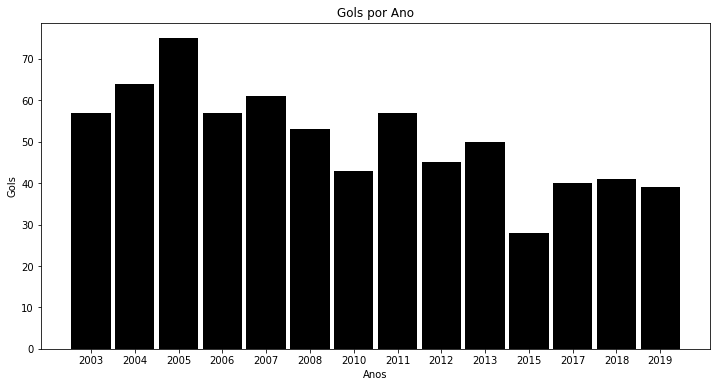

In [17]:
r =[0,1,2,3,4,5,6,7,8,9,10,11,12,13]
#print(r)
nomes = ('2003','2004','2005','2006','2007','2008','2010','2011','2012','2013','2015','2017','2018','2019')

coluna1 = gp_geral['Gols']
#print(gp_geral['Gols'])
# gráfico
barWidth = 0.9
# Criando a barra de gols marcados
plt.bar(r, coluna1, color='black', width=barWidth)

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Gols")
plt.title("Gols por Ano")

# Tamanho do gráfico
plt.rcParams["figure.figsize"] = [12,6]
 
# Visualizar o gráfico
plt.show()

**Gols marcados por partida **

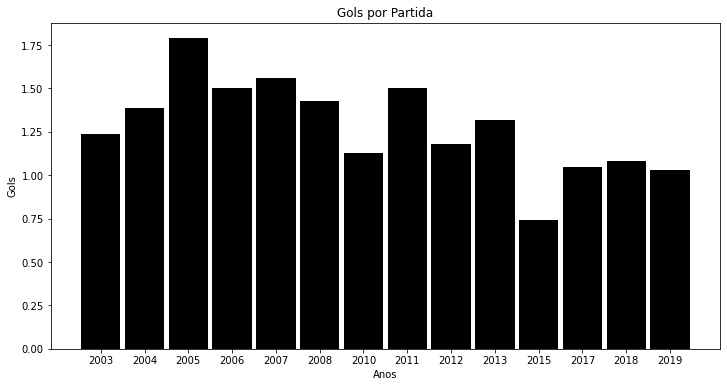

In [18]:
coluna1 = gp_geral['GP Geral']

# gráfico
barWidth = 0.9
# Criando a barra de gols marcados por partida
plt.bar(r, coluna1, color='black', width=barWidth)

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Gols")
plt.title("Gols por Partida")

# Tamanho do gráfico
plt.rcParams["figure.figsize"] = [12,6]
 
# Visualizar o gráfico
plt.show()

**Distribuição dos gols em casa e fora de casa**

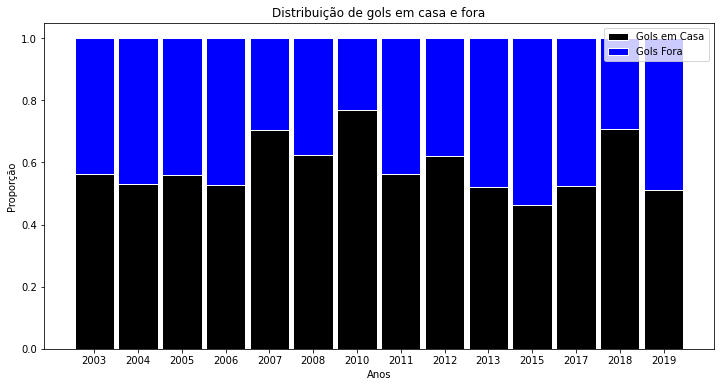

In [19]:
coluna1 = gp_geral['Mandante Gols']/gp_geral['Gols']
coluna2 = gp_geral['Visitante Gols']/gp_geral['Gols']

# gráfico
barWidth = 0.9
# Criando a barra de gols em casa
plt.bar(r, coluna1, color='black', edgecolor='white', width=barWidth,label='Gols em Casa')
# Criando a barra de gols fora de casa
plt.bar(r, coluna2, bottom=coluna1, color='blue', edgecolor='white', width=barWidth,label='Gols Fora')

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Proporção")
plt.title("Distribuição de gols em casa e fora")
 
plt.rcParams["figure.figsize"] = [12,6]
    
# Visualizar o gráfico
plt.legend()
plt.show()

**Calculando a média de gols do Vasco da Gama por partida, média de gols em casa e média de gols fora de casa**

In [20]:
# Gols por jogo
gols = gp_geral['Gols'].sum()
partidas =  gp_geral['Partidas'].sum()
gols_partida = gols/partidas
print("O Vasco da Gama tem uma média de "+str(round(gols_partida,1))+ " gols por partida")

# Gols por jogo em casa
gols_casa = gp_geral['Mandante Gols'].sum()
partidas_casa =  gp_geral['Partidas mandante'].sum()
gols_partida_casa = gols_casa/partidas_casa
print("Em casa, o Vasco da Gama tem uma média de "+str(round(gols_partida_casa,1))+ " gols por partida")

# Gols por jogo fora de casa
gols_fora = gp_geral['Visitante Gols'].sum()
partidas_fora =  gp_geral['Partidas visitante'].sum()
gols_partida_fora = gols_fora/partidas_fora
print("Fora de casa, o Vasco da Gama tem uma média de "+str(round(gols_partida_fora,1))+ " gols por partida")

O Vasco da Gama tem uma média de 1.3 gols por partida
Em casa, o Vasco da Gama tem uma média de 1.5 gols por partida
Fora de casa, o Vasco da Gama tem uma média de 1.1 gols por partida


# **Resultados**

Vendo o desempenho do Vasco da Gama jogando em casa e fora de casa, aproveitando os dataframes Mandante e Visitante

In [21]:
# Contar o número de vitórias
vitorias_casa=mandante.groupby('Ano')['Vencedor'].apply(lambda x: (x=='Vasco').sum()).reset_index(name='Vitórias')

# Contar o número de empates
empates_casa=mandante.groupby('Ano')['Vencedor'].apply(lambda x: (x=='Empate').sum()).reset_index(name='Empates')

# Juntar os dataframes
resultado_casa = jogos_mandante.merge(vitorias_casa, how='left', on='Ano')
resultado_casa = resultado_casa.merge(empates_casa, how='left', on='Ano')

# Ajeitar coluna
resultado_casa = resultado_casa.rename(columns={"Partidas mandante":"Jogos"}) 

# Criar coluna de derrotas
resultado_casa['Derrotas']= resultado_casa['Jogos'] - resultado_casa['Vitórias']-resultado_casa['Empates']

**Desempenho dos Jogos em casa**

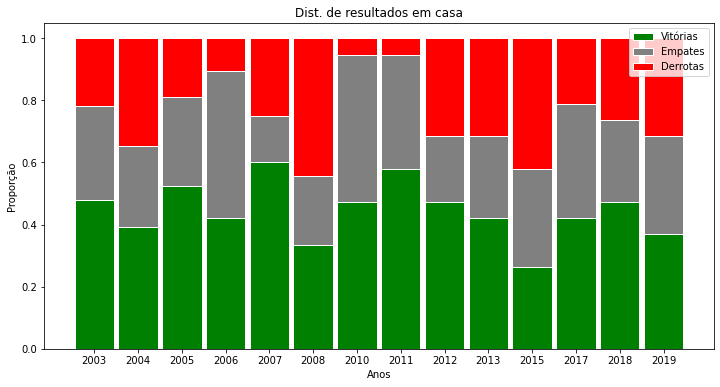

In [22]:
coluna1 = resultado_casa['Vitórias']/resultado_casa['Jogos']
coluna2 = resultado_casa['Empates']/resultado_casa['Jogos']
coluna3 = resultado_casa['Derrotas']/resultado_casa['Jogos']

# gráfico
barWidth = 0.9
# Criando a barra de vitórias
plt.bar(r, coluna1, color='green', edgecolor='white', width=barWidth,label='Vitórias')
# Criando a barra de empates
plt.bar(r, coluna2, bottom=coluna1, color='gray', edgecolor='white', width=barWidth,label='Empates')
# Criando a barra de derrotas
plt.bar(r, coluna3, bottom=[i+j for i,j in zip(coluna1, coluna2)], color='red', edgecolor='white',
        width=barWidth,label='Derrotas')

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Proporção")
plt.title("Dist. de resultados em casa")
 
# Visualizar o gráfico
plt.legend()
plt.show()

**Aproveitamento de pontos em casa**

In [23]:
resultado_casa['% Aprov.']= round((3*resultado_casa['Vitórias']+resultado_casa['Empates'])/(3*resultado_casa['Jogos']),2)
print(resultado_casa)

     Ano  Jogos  Vitórias  Empates  Derrotas  % Aprov.
0   2003     23        11        7         5      0.58
1   2004     23         9        6         8      0.48
2   2005     21        11        6         4      0.62
3   2006     19         8        9         2      0.58
4   2007     20        12        3         5      0.65
5   2008     18         6        4         8      0.41
6   2010     19         9        9         1      0.63
7   2011     19        11        7         1      0.70
8   2012     19         9        4         6      0.54
9   2013     19         8        5         6      0.51
10  2015     19         5        6         8      0.37
11  2017     19         8        7         4      0.54
12  2018     19         9        5         5      0.56
13  2019     19         7        6         6      0.47


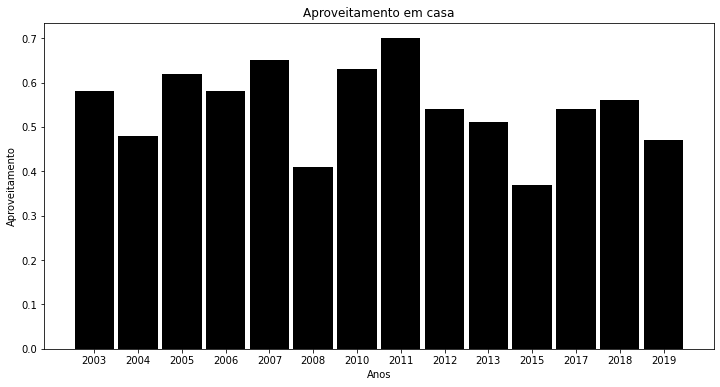

In [24]:
coluna1 = resultado_casa['% Aprov.']

# gráfico
barWidth = 0.9
# Criando a barra de aproveitamento
plt.bar(r, coluna1, color='black', width=barWidth)

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Aproveitamento")
plt.title("Aproveitamento em casa")

plt.rcParams["figure.figsize"] = [12,6]
 
# Visualizar o gráfico
plt.show()

In [25]:
# Contar o número de vitórias
vitorias_fora=visitante.groupby('Ano')['Vencedor'].apply(lambda x: (x=='Vasco').sum()).reset_index(name='Vitórias')

# Contar o número de empates
empates_fora=visitante.groupby('Ano')['Vencedor'].apply(lambda x: (x=='Empate').sum()).reset_index(name='Empates')

# Juntar os dataframes
resultado_fora = jogos_visitante.merge(vitorias_fora, how='left', on='Ano')
resultado_fora = resultado_fora.merge(empates_fora, how='left', on='Ano') 

# Ajeitar coluna
resultado_fora = resultado_fora.rename(columns={"Partidas visitante":"Jogos"})

# Criar coluna de derrotas
resultado_fora['Derrotas']= resultado_fora['Jogos'] - resultado_fora['Vitórias']-resultado_fora['Empates']

**Desempenho dos Jogos Fora de casa**

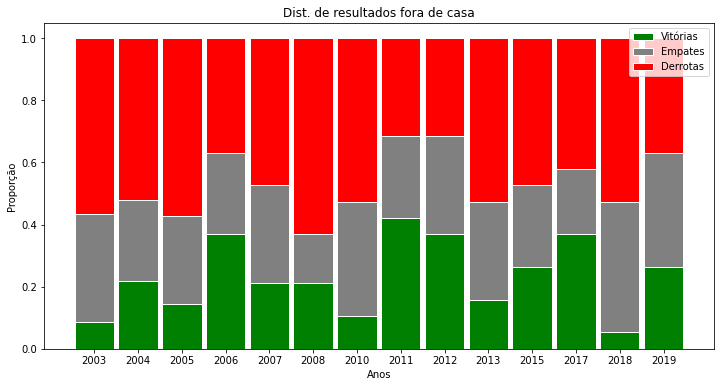

In [26]:
coluna1 = resultado_fora['Vitórias']/resultado_fora['Jogos']
coluna2 = resultado_fora['Empates']/resultado_fora['Jogos']
coluna3 = resultado_fora['Derrotas']/resultado_fora['Jogos']

# gráfico
barWidth = 0.9
# Criando a barra de vitórias
plt.bar(r, coluna1, color='green', edgecolor='white', width=barWidth,label='Vitórias')
# Criando a barra de empates
plt.bar(r, coluna2, bottom=coluna1, color='gray', edgecolor='white', width=barWidth,label='Empates')
# Criando a barra de derrotas
plt.bar(r, coluna3, bottom=[i+j for i,j in zip(coluna1, coluna2)], color='red', edgecolor='white',
        width=barWidth,label='Derrotas')

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Proporção")
plt.title("Dist. de resultados fora de casa")
 
# Visualizar o gráfico
plt.legend()
plt.show()

**Aproveitamento de pontos fora de casa**

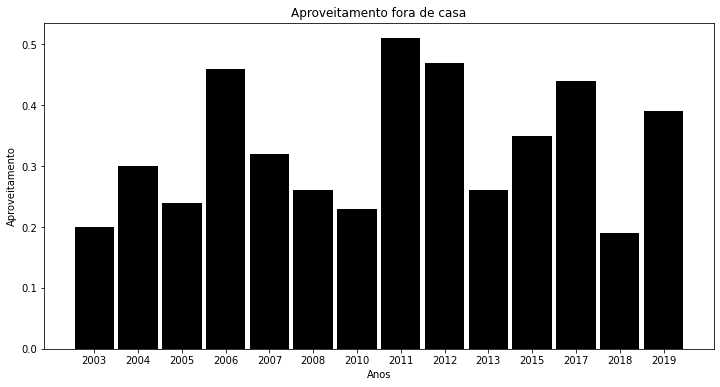

In [27]:
resultado_fora['% Aprov.']= round((3*resultado_fora['Vitórias']+resultado_fora['Empates'])/(3*resultado_fora['Jogos']),2)

coluna1 = resultado_fora['% Aprov.']

# gráfico
barWidth = 0.9
# Criando a barra de aproveitamento
plt.bar(r, coluna1, color='black', width=barWidth)

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Aproveitamento")
plt.title("Aproveitamento fora de casa")

plt.rcParams["figure.figsize"] = [12,6]
 
# Visualizar o gráfico
plt.show()

**Aproveitamento total do Vasco da Gama em cada ano**

In [28]:
# Deletar colunas de aproveitamento
resultado_casa = resultado_casa.drop(['% Aprov.'], axis = 1)
resultado_fora = resultado_fora.drop(['% Aprov.'], axis = 1)

# Deletar coluna repetida
resultado_casa = resultado_casa.drop(['Jogos'], axis = 1)
resultado_fora = resultado_fora.drop(['Jogos'], axis = 1)

# Renomear colunas
resultado_casa = resultado_casa.rename(columns={"Vitórias":"Vit casa","Empates":"Emp casa","Derrotas":"Der casa"})
resultado_fora = resultado_fora.rename(columns={"Vitórias":"Vit fora","Empates":"Emp fora","Derrotas":"Der fora"})

# Juntar dataframes
resultado = jogos.merge(resultado_casa, how='left', on='Ano')
resultado = resultado.merge(resultado_fora, how='left', on='Ano')

# Coluna de Pontos
resultado['Pts'] = 3*(resultado['Vit casa']+resultado['Vit fora'])+resultado['Emp casa']+resultado['Emp fora']

# Coluna com a proporção de pontos conquistados em casa
resultado['% Pts casa']= round((3*resultado['Vit casa']+resultado['Emp casa'])/resultado['Pts'],2)

# Coluna com a proporção de pontos conquistados fora de casa
resultado['% Pts fora']= round((3*resultado['Vit fora']+resultado['Emp fora'])/resultado['Pts'],2)

resultado['Vit'] = resultado['Vit casa'] + resultado['Vit fora']
resultado['Der'] = resultado['Der casa'] + resultado['Der fora']
resultado['Emp'] = resultado['Emp casa'] + resultado['Emp fora']

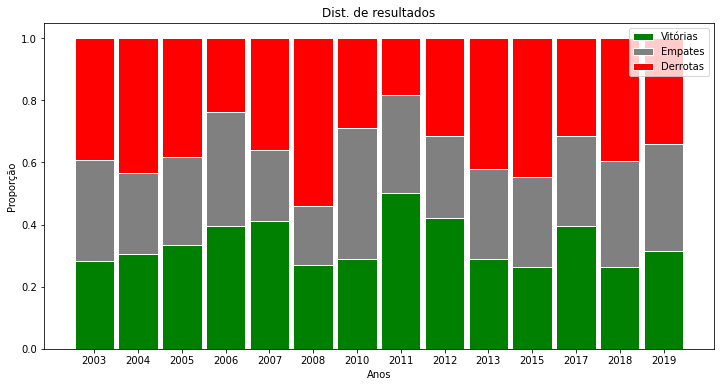

In [29]:
coluna1 = resultado['Vit']/resultado['Jogos']
coluna2 = resultado['Emp']/resultado['Jogos']
coluna3 = resultado['Der']/resultado['Jogos']

# gráfico
barWidth = 0.9
# Criando a barra de vitórias
plt.bar(r, coluna1, color='green', edgecolor='white', width=barWidth,label='Vitórias')
# Criando a barra de empates
plt.bar(r, coluna2, bottom=coluna1, color='gray', edgecolor='white', width=barWidth,label='Empates')
# Criando a barra de derrotas
plt.bar(r, coluna3, bottom=[i+j for i,j in zip(coluna1, coluna2)], color='red', edgecolor='white',
        width=barWidth,label='Derrotas')

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Proporção")
plt.title("Dist. de resultados")
 
# Visualizar o gráfico
plt.legend()
plt.show()

**Aproveitamentos dos Pontos**

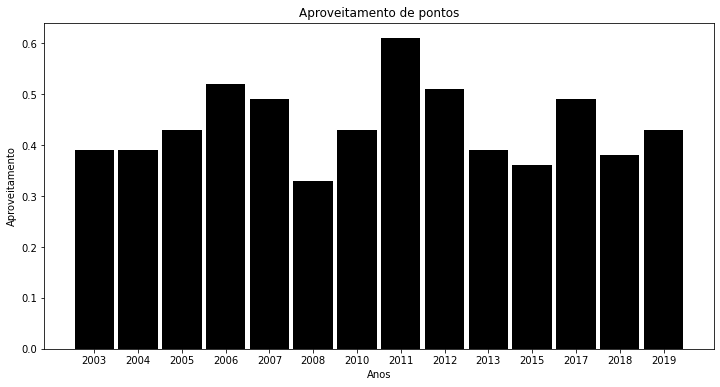

In [30]:
resultado['% Aprov.']= round((3*resultado['Vit']+resultado['Emp'])/(3*resultado['Jogos']),2)

coluna1 = resultado['% Aprov.']

# gráfico
barWidth = 0.9
# Criando a barra de aproveitamento
plt.bar(r, coluna1, color='black', width=barWidth)

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Aproveitamento")
plt.title("Aproveitamento de pontos")

plt.rcParams["figure.figsize"] = [12,6]
 
# Visualizar o gráfico
plt.show()

**Grafico de exibição dos pontos conquistados em cada ano**

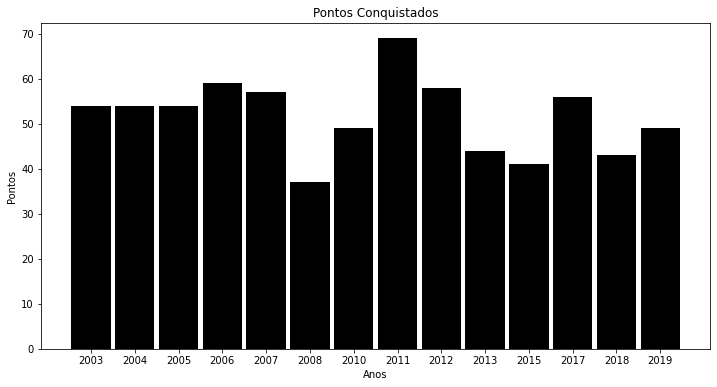

In [31]:
coluna1 = resultado['Pts']

# gráfico
barWidth = 0.9
# Criando a barra de pontos conquistados
plt.bar(r, coluna1, color='black', width=barWidth)

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Pontos")
plt.title("Pontos Conquistados")

plt.rcParams["figure.figsize"] = [12,6]
 
# Visualizar o gráfico
plt.show()

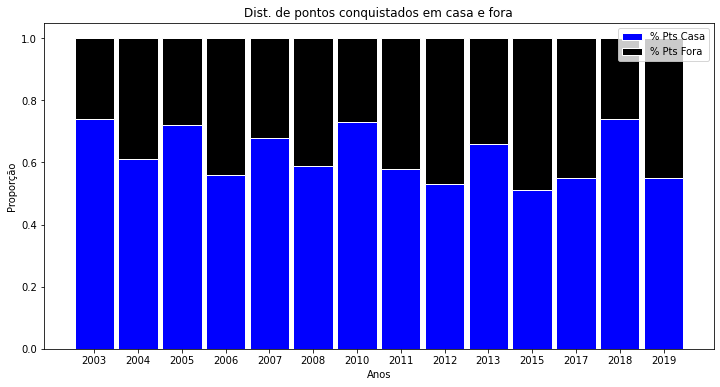

In [32]:
coluna1 = resultado['% Pts casa']
coluna2 = resultado['% Pts fora']

# gráfico
barWidth = 0.9
# Criando a barra de pontos conquistados em casa
plt.bar(r, coluna1, color='blue', edgecolor='white', width=barWidth,label='% Pts Casa')
# Criando a barra de pontos conquistados fora de casa
plt.bar(r, coluna2, bottom=coluna1, color='black', edgecolor='white', width=barWidth,label='% Pts Fora')

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Proporção")
plt.title("Dist. de pontos conquistados em casa e fora")
 
plt.rcParams["figure.figsize"] = [12,6]
    
# Visualizar o gráfico
plt.legend()
plt.show()

# Adversários

**Times que mais venceram o Vasco da Gama**

In [35]:

# Somar as vitórias por adversário
adversarios_vit = df.groupby('Vencedor')['Vencedor'].count()
adversarios_vit = pd.DataFrame(adversarios_vit)
adversarios_vit.columns = ['Vitórias']
adversarios_vit.reset_index(level=0, inplace=True)

# Eliminar as linhas com as vitórias do Vasco e Empates
adversarios_vit = adversarios_vit.drop(adversarios_vit[(adversarios_vit['Vencedor'] == 'Vasco')].index)
adversarios_vit = adversarios_vit.drop(adversarios_vit[(adversarios_vit['Vencedor'] == 'Empate')].index)

# Ordenar o Dataframe em ordem decrescente
adversarios_vit.sort_values(by=['Vitórias'], inplace=True, ascending=False)

# Criar gráfico
ax = adversarios_vit.plot.barh(x='Vencedores', y='Vitórias',color ='blue',figsize=(10,10))


KeyError: ignored

**Times que mais fizeram gols no Vasco da Gama**

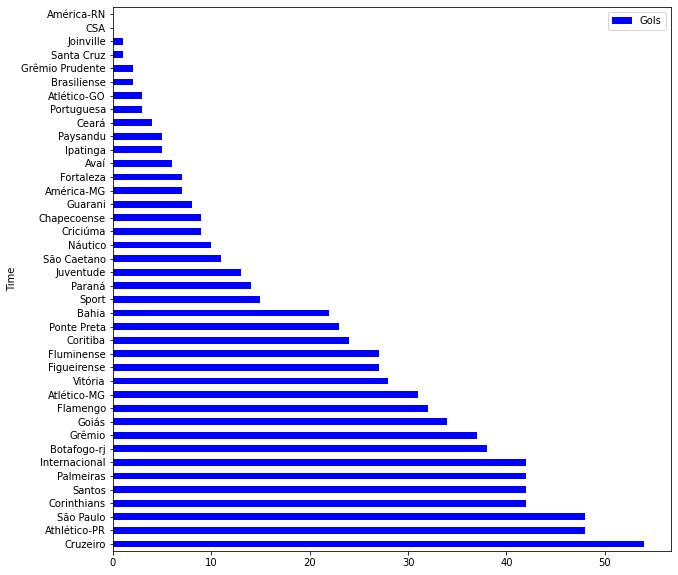

In [36]:
# Pelo dataframe 'Mandante'
gols_adversarios_casa = mandante.groupby('Visitante')['Visitante Gols'].sum()
gols_adversarios_casa = pd.DataFrame(gols_adversarios_casa)
gols_adversarios_casa.columns = ['Gols Casa']
gols_adversarios_casa.reset_index(level=0, inplace=True)
gols_adversarios_casa.columns = ['Time','Gols Casa']

# Pelo dataframe 'Visitante'
gols_adversarios_fora = visitante.groupby('Mandante')['Mandante Gols'].sum()
gols_adversarios_fora = pd.DataFrame(gols_adversarios_fora)
gols_adversarios_fora.columns = ['Gols Fora']
gols_adversarios_fora.reset_index(level=0, inplace=True)
gols_adversarios_fora.columns = ['Time','Gols Fora']

# Juntando os dataframes
gols_adversarios = gols_adversarios_casa.merge(gols_adversarios_fora, how='left', on='Time')

# Criar coluna total com os gols marcados por adversarios
gols_adversarios['Gols'] = gols_adversarios['Gols Casa'] + gols_adversarios['Gols Fora']

# Ordenar o dataframe
gols_adversarios.sort_values(by=['Gols'], inplace=True, ascending=False)

# Criar gráfico
ax = gols_adversarios.plot.barh(x='Time', y='Gols',color ='blue',figsize=(10,10))

**Times que mais perderam para o Vasco da Gama**

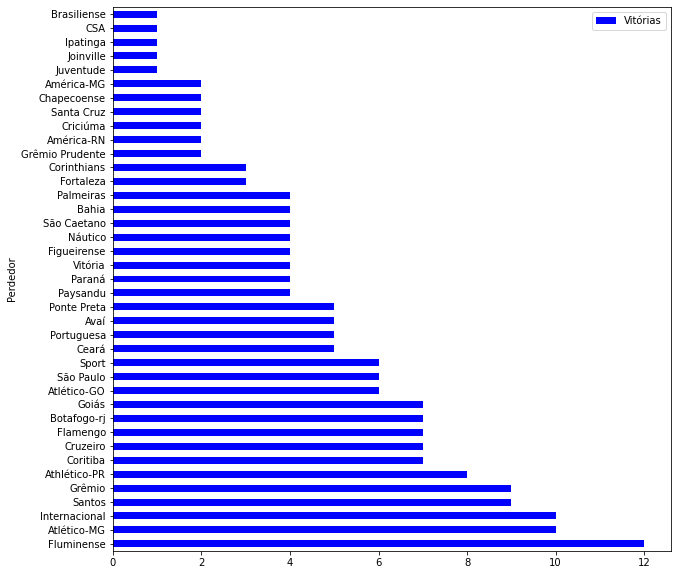

In [37]:
# Criar um dataframe com a coluna de perdedores
perdedores = df.copy()

# Criar a coluna de perdedores
condicoes = [(perdedores['Mandante'] == perdedores['Vencedor']),(perdedores['Visitante'] == perdedores['Vencedor'])]
valores = [perdedores['Visitante'], perdedores['Mandante']]
perdedores['Perdedor'] = np.select(condicoes, valores, default='Empate')

# Contar o número de vitórias do Vasco sobre cada adversário
vasco_vit = perdedores.groupby('Perdedor')['Perdedor'].count()
vasco_vit = pd.DataFrame(vasco_vit)
vasco_vit.columns = ['Vitórias']
vasco_vit.reset_index(level=0, inplace=True)

# Eliminar as linhas com as vitórias do Vasco e Empates
vasco_vit = vasco_vit.drop(vasco_vit[(vasco_vit['Perdedor'] == 'Vasco')].index)
vasco_vit = vasco_vit.drop(vasco_vit[(vasco_vit['Perdedor'] == 'Empate')].index)

# Ordenar o Dataframe em ordem decrescente
vasco_vit.sort_values(by=['Vitórias'], inplace=True, ascending=False)

# Criar gráfico
ax = vasco_vit.plot.barh(x='Perdedor', y='Vitórias',color ='blue',figsize=(10,10))

**Times que mais levaram gols do Vasco**

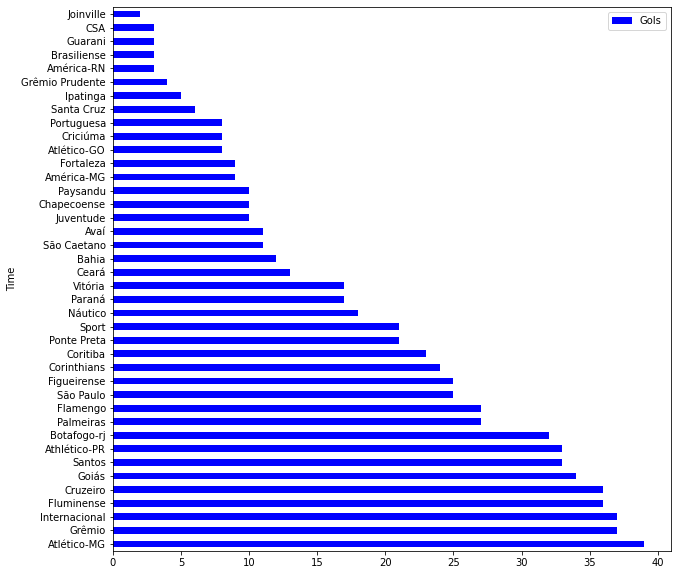

In [38]:

# Pelo dataframe 'Mandante'
gols_vasco_casa = mandante.groupby('Visitante')['Mandante Gols'].sum()
gols_vasco_casa = pd.DataFrame(gols_vasco_casa)
gols_vasco_casa.columns = ['Gols Vasco Casa']
gols_vasco_casa.reset_index(level=0, inplace=True)
gols_vasco_casa.columns = ['Time','Gols Vasco Casa']

# Pelo dataframe 'Visitante'
gols_vasco_fora = visitante.groupby('Mandante')['Visitante Gols'].sum()
gols_vasco_fora = pd.DataFrame(gols_vasco_fora)
gols_vasco_fora.columns = ['Gols Vasco Fora']
gols_vasco_fora.reset_index(level=0, inplace=True)
gols_vasco_fora.columns = ['Time','Gols Vasco Fora']

# Juntando os dataframes
gols_vasco = gols_vasco_casa.merge(gols_vasco_fora, how='left', on='Time')

# Criar coluna total com os gols marcados por adversarios
gols_vasco['Gols'] = gols_vasco['Gols Vasco Casa'] + gols_vasco['Gols Vasco Fora']

# Ordenar o dataframe
gols_vasco.sort_values(by=['Gols'], inplace=True, ascending=False)

# Criar gráfico
ax = gols_vasco.plot.barh(x='Time', y='Gols',color ='blue',figsize=(10,10))


# Resultados Finais 2003-2019

In [39]:
# Vitórias
vitorias = resultado['Vit'].sum()
print('O Vasco da Gama venceu '+str(vitorias) + ' jogos.')

# Derrotas
derrotas = resultado['Der'].sum()
print('O Vasco da Gama perdeu '+str(derrotas) + ' jogos.')

# Empates
empates = resultado['Emp'].sum()
print('O Vasco da Gama empatou '+str(empates) + ' jogos.')

# Gols Marcados
print('O Vasco da Gama marcou '+str(gols) + ' gols.')

# Gols por partida
print('O Vasco da Gama marcou '+str(round(gols_partida,1)) + ' gols por partida.')

# Aproveitamento de pontos
pontos = 3*vitorias+empates
aproveitamento = pontos/(3*(vitorias+derrotas+empates))
print('O Vasco da Gama teve aproveitamento de '+str(100*round(aproveitamento,1)) + '%.')

O Vasco da Gama venceu 186 jogos.
O Vasco da Gama perdeu 200 jogos.
O Vasco da Gama empatou 166 jogos.
O Vasco da Gama marcou 710 gols.
O Vasco da Gama marcou 1.3 gols por partida.
O Vasco da Gama teve aproveitamento de 40.0%.


# Convertendo tudo para Html

Baixe o arquivo .iptynb atual, clicando em arquivo -> Fazer download do.iptynb
Faça o upload do arquivo .iptynb baixado e execute o comando abaixo:

In [41]:
%%shell
jupyter nbconvert --to html /content/VascodaGama.ipynb

[NbConvertApp] Converting notebook /content/VascodaGama.ipynb to html
[NbConvertApp] Writing 812312 bytes to /content/VascodaGama.html


# **Dashboard em Bootstrap**

Execute o código abaixo e clique no botão de menu no lado direito e escolha a opção: Ver saída em tela cheia

In [42]:
from IPython.display import display, HTML, IFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as rc
from IPython.display import Image
import base64
df = pd.read_csv("campeonato-brasileiro-full.csv")
# Convertendo para o html
#pd.set_option('display.max_colwidth', 10)
htmTable = df.head().to_html(classes="table table-hover table-dark table-responsive")
df = df.replace(['INTERNACIONAL','REMO','MALUTROM','PALMEIRAS','BAHIA','CRUZEIRO','PONTE PRETA',
                 'FLUMINENSE','SPORT','VASCO','SANTOS','CORINTHIANS','JUVENTUDE','FLAMENGO','GUARANI','PAYSANDU','Botafogo-RJ'],
                ['Internacional','Remo','Malutrom','Palmeiras','Bahia','Cruzeiro','Ponte Preta',
                 'Fluminense','Sport','Vasco','Santos','Corinthians','Juventude','Flamengo','Guarani','Paysandu','Botafogo-rj'])
# Criar coluna 'Ano'
df['Data'] = pd.to_datetime(df['Data'])
df['Ano'] = df['Data'].dt.year

# Eliminar as partidas antes de 2003
df = df.drop(df[df.Ano < 2003].index)

# Eliminar colunas que não serão usadas
df = df.drop(['Horário', 'Dia','Rodada','Arena','Clube 1 Estado','Clube 2 Estado','Estado Clube Vencedor'], axis = 1)

# Renomear colunas
df = df.rename(columns={"Clube 1":"Mandante","Clube 2":"Visitante","Clube 1 Gols":"Mandante Gols",
                        "Clube 2 Gols":"Visitante Gols"})

# Trocar "-" por "Empate" na coluna 'Vencedor'
df = df.replace('-','Empate')

# Criar outro dataframe
dados = df.copy()

# Eliminar partidas que o Flamengo não jogou
df = df.drop(df[(df['Mandante'] != 'Vasco') & (df['Visitante'] != 'Vasco')].index)

# Vamos dar uma olhada no dataframe
df.to_csv('novo_dataframe.csv', sep='\t', encoding='utf-8')
htmtable2 = df.head().to_html(classes="table table-hover table-dark table-responsive")

jogos = df.groupby('Ano')['Ano'].count()
jogos = pd.DataFrame(jogos)
jogos.columns = ['Jogos']
jogos.reset_index(level=0, inplace=True)
df = jogos
df.to_csv('jogos.csv', sep='\t', encoding='utf-8')
htmtable3 = df.head().to_html(classes="table table-hover table-dark table-responsive")

## Partidas como mandante ##
# Criar um dataframe para partidas como mandante
df = dados
mandante = df.copy()
mandante = mandante.drop(mandante[mandante['Mandante'] != 'Vasco'].index)

# Criar um dataframe com nº de jogos por ano
jogos_mandante = mandante.groupby('Ano')['Ano'].count()
jogos_mandante = pd.DataFrame(jogos_mandante)
jogos_mandante.columns = ['Partidas mandante']
jogos_mandante.reset_index(level=0, inplace=True)

# Dataframe com o nº de gols por edição
gols_mandante = mandante.groupby('Ano')['Mandante Gols'].sum()
gols_mandante = pd.DataFrame(gols_mandante)
gols_mandante.columns = ['Mandante Gols']
gols_mandante.reset_index(level=0, inplace=True)

# Dataframe com partidas e gols por edição
gp_mandante = jogos_mandante.merge(gols_mandante, how='left', on='Ano')

# Criar coluna com a média de gols por partida
gp_mandante['GP Mandante'] = round(gp_mandante['Mandante Gols']/gp_mandante['Partidas mandante'],2)

## Partidas como visitante ##
# Criar um dataframe para partidas como visitante
visitante = df.copy()
visitante = visitante.drop(visitante[visitante['Visitante'] != 'Vasco'].index)

# Criar um dataframe com nº de jogos por ano
jogos_visitante = visitante.groupby('Ano')['Ano'].count()
jogos_visitante = pd.DataFrame(jogos_visitante)
jogos_visitante.columns = ['Partidas visitante']
jogos_visitante.reset_index(level=0, inplace=True)

# Dataframe com o nº de gols por edição
gols_visitante = visitante.groupby('Ano')['Visitante Gols'].sum()
gols_visitante = pd.DataFrame(gols_visitante)
gols_visitante.columns = ['Visitante Gols']
gols_visitante.reset_index(level=0, inplace=True)

# Dataframe com partidas e gols por edição
gp_visitante = jogos_visitante.merge(gols_visitante, how='left', on='Ano')

# Criar coluna com a média de gols por partida
gp_visitante['GP Visitante'] = round(gp_visitante['Visitante Gols']/gp_visitante['Partidas visitante'],2)

## Todas as Partidas ##
gp_geral = gp_mandante.merge(gp_visitante, how='left', on='Ano')
gp_geral['Partidas'] = gp_geral['Partidas mandante'] + gp_geral['Partidas visitante']
gp_geral['Gols'] = gp_geral['Mandante Gols'] + gp_geral['Visitante Gols']
gp_geral['GP Geral'] = round(gp_geral['Gols']/gp_geral['Partidas'],2)
#print(gp_geral)
df = gp_geral
df.to_csv('gols.csv', sep='\t', encoding='utf-8')
htmtable4 = df.head().to_html(classes="table table-hover table-dark table-responsive")

r =[0,1,2,3,4,5,6,7,8,9,10,11,12,13]
#print(r)
nomes = ('2003','2004','2005','2006','2007','2008','2010','2011','2012','2013','2015','2017','2018','2019')

coluna1 = gp_geral['Gols']
#print(gp_geral['Gols'])
# gráfico
barWidth = 0.9
# Criando a barra de gols marcados
plt.bar(r, coluna1, color='black', width=barWidth)

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Gols")
plt.title("Gols por Ano")

# Tamanho do gráfico
plt.rcParams["figure.figsize"] = [12,6]
 
# Visualizar o gráfico
#grafico1 = plt.show()
grafico1 =plt.savefig('/usr/local/share/jupyter/nbextensions/grafico1.png')

plt.close(grafico1)
#caminho1 = Image(filename='grafico1.png') 
#print(caminho1)
#app= display(Image('grafico1.png'))
#Encoded_Image=str(base64.b64encode(Image(filename='grafico1.png').data))


coluna1 = gp_geral['GP Geral']

# gráfico
barWidth = 0.9
# Criando a barra de gols marcados por partida
plt.bar(r, coluna1, color='black', width=barWidth)

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Gols")
plt.title("Gols por Partida")

# Tamanho do gráfico
plt.rcParams["figure.figsize"] = [12,6]
 
# Visualizar o gráfico
#plt.show()
grafico2 =plt.savefig('/usr/local/share/jupyter/nbextensions/grafico2.png')

plt.close(grafico2)

coluna1 = gp_geral['Mandante Gols']/gp_geral['Gols']
coluna2 = gp_geral['Visitante Gols']/gp_geral['Gols']

# gráfico
barWidth = 0.9
# Criando a barra de gols em casa
plt.bar(r, coluna1, color='black', edgecolor='white', width=barWidth,label='Gols em Casa')
# Criando a barra de gols fora de casa
plt.bar(r, coluna2, bottom=coluna1, color='blue', edgecolor='white', width=barWidth,label='Gols Fora')

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Proporção")
plt.title("Distribuição de gols em casa e fora")
 
plt.rcParams["figure.figsize"] = [12,6]
    
# Visualizar o gráfico
plt.legend()
#plt.show()
grafico3 =plt.savefig('/usr/local/share/jupyter/nbextensions/grafico3.png')

plt.close(grafico3)

# Gols por jogo
gols = gp_geral['Gols'].sum()
partidas =  gp_geral['Partidas'].sum()
gols_partida = gols/partidas
frase1 = "O Vasco da Gama tem uma média de "+str(round(gols_partida,1))+ " gols por partida"

# Gols por jogo em casa
gols_casa = gp_geral['Mandante Gols'].sum()
gols_partida_casa =  gp_geral['Partidas mandante'].sum()
frase2 = "Em casa, o Vasco da Gama tem uma média de "+str(round(gols_partida_casa,1))+ " gols por partida"

# Gols por jogo fora de casa
gols_fora = gp_geral['Visitante Gols'].sum()
partidas_fora =  gp_geral['Partidas visitante'].sum()
gols_partida_fora = gols_fora/partidas_fora
frase3 = "Fora de casa, o Vasco da Gama tem uma média de "+str(round(gols_partida_fora,1))+ " gols por partida"

# Contar o número de vitórias
vitorias_casa=mandante.groupby('Ano')['Vencedor'].apply(lambda x: (x=='Vasco').sum()).reset_index(name='Vitórias')

# Contar o número de empates
empates_casa=mandante.groupby('Ano')['Vencedor'].apply(lambda x: (x=='Empate').sum()).reset_index(name='Empates')

# Juntar os dataframes
resultado_casa = jogos_mandante.merge(vitorias_casa, how='left', on='Ano')
resultado_casa = resultado_casa.merge(empates_casa, how='left', on='Ano')

# Ajeitar coluna
resultado_casa = resultado_casa.rename(columns={"Partidas mandante":"Jogos"}) 

# Criar coluna de derrotas
resultado_casa['Derrotas']= resultado_casa['Jogos'] - resultado_casa['Vitórias']-resultado_casa['Empates']

coluna1 = resultado_casa['Vitórias']/resultado_casa['Jogos']
coluna2 = resultado_casa['Empates']/resultado_casa['Jogos']
coluna3 = resultado_casa['Derrotas']/resultado_casa['Jogos']

# gráfico
barWidth = 0.9
# Criando a barra de vitórias
plt.bar(r, coluna1, color='green', edgecolor='white', width=barWidth,label='Vitórias')
# Criando a barra de empates
plt.bar(r, coluna2, bottom=coluna1, color='gray', edgecolor='white', width=barWidth,label='Empates')
# Criando a barra de derrotas
plt.bar(r, coluna3, bottom=[i+j for i,j in zip(coluna1, coluna2)], color='red', edgecolor='white',
        width=barWidth,label='Derrotas')

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Proporção")
plt.title("Dist. de resultados em casa")
 
# Visualizar o gráfico
plt.legend()
#plt.show()
grafico4 =plt.savefig('/usr/local/share/jupyter/nbextensions/grafico4.png')

plt.close(grafico4)

resultado_casa['% Aprov.']= round((3*resultado_casa['Vitórias']+resultado_casa['Empates'])/(3*resultado_casa['Jogos']),2)
#print(resultado_casa)
df = resultado_casa
df.to_csv('resultado_casa.csv', sep='\t', encoding='utf-8')
htmtable5 = df.head().to_html(classes="table table-hover table-dark table-responsive")

coluna1 = resultado_casa['% Aprov.']

# gráfico
barWidth = 0.9
# Criando a barra de aproveitamento
plt.bar(r, coluna1, color='black', width=barWidth)

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Aproveitamento")
plt.title("Aproveitamento em casa")

plt.rcParams["figure.figsize"] = [12,6]
 
# Visualizar o gráfico
#plt.show()
grafico5 =plt.savefig('/usr/local/share/jupyter/nbextensions/grafico5.png')

plt.close(grafico5)

# Contar o número de vitórias
vitorias_fora=visitante.groupby('Ano')['Vencedor'].apply(lambda x: (x=='Vasco').sum()).reset_index(name='Vitórias')

# Contar o número de empates
empates_fora=visitante.groupby('Ano')['Vencedor'].apply(lambda x: (x=='Empate').sum()).reset_index(name='Empates')

# Juntar os dataframes
resultado_fora = jogos_visitante.merge(vitorias_fora, how='left', on='Ano')
resultado_fora = resultado_fora.merge(empates_fora, how='left', on='Ano') 

# Ajeitar coluna
resultado_fora = resultado_fora.rename(columns={"Partidas visitante":"Jogos"})

# Criar coluna de derrotas
resultado_fora['Derrotas']= resultado_fora['Jogos'] - resultado_fora['Vitórias']-resultado_fora['Empates']

coluna1 = resultado_fora['Vitórias']/resultado_fora['Jogos']
coluna2 = resultado_fora['Empates']/resultado_fora['Jogos']
coluna3 = resultado_fora['Derrotas']/resultado_fora['Jogos']

# gráfico
barWidth = 0.9
# Criando a barra de vitórias
plt.bar(r, coluna1, color='green', edgecolor='white', width=barWidth,label='Vitórias')
# Criando a barra de empates
plt.bar(r, coluna2, bottom=coluna1, color='gray', edgecolor='white', width=barWidth,label='Empates')
# Criando a barra de derrotas
plt.bar(r, coluna3, bottom=[i+j for i,j in zip(coluna1, coluna2)], color='red', edgecolor='white',
        width=barWidth,label='Derrotas')

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Proporção")
plt.title("Dist. de resultados fora de casa")
 
# Visualizar o gráfico
plt.legend()
#plt.show()
grafico6 =plt.savefig('/usr/local/share/jupyter/nbextensions/grafico6.png')

plt.close(grafico6)

resultado_fora['% Aprov.']= round((3*resultado_fora['Vitórias']+resultado_fora['Empates'])/(3*resultado_fora['Jogos']),2)

coluna1 = resultado_fora['% Aprov.']

# gráfico
barWidth = 0.9
# Criando a barra de aproveitamento
plt.bar(r, coluna1, color='black', width=barWidth)

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Aproveitamento")
plt.title("Aproveitamento fora de casa")

plt.rcParams["figure.figsize"] = [12,6]
 
# Visualizar o gráfico
#plt.show()
grafico7 =plt.savefig('/usr/local/share/jupyter/nbextensions/grafico7.png')

plt.close(grafico7)

# Deletar colunas de aproveitamento
resultado_casa = resultado_casa.drop(['% Aprov.'], axis = 1)
resultado_fora = resultado_fora.drop(['% Aprov.'], axis = 1)

# Deletar coluna repetida
resultado_casa = resultado_casa.drop(['Jogos'], axis = 1)
resultado_fora = resultado_fora.drop(['Jogos'], axis = 1)

# Renomear colunas
resultado_casa = resultado_casa.rename(columns={"Vitórias":"Vit casa","Empates":"Emp casa","Derrotas":"Der casa"})
resultado_fora = resultado_fora.rename(columns={"Vitórias":"Vit fora","Empates":"Emp fora","Derrotas":"Der fora"})

# Juntar dataframes
resultado = jogos.merge(resultado_casa, how='left', on='Ano')
resultado = resultado.merge(resultado_fora, how='left', on='Ano')

# Coluna de Pontos
resultado['Pts'] = 3*(resultado['Vit casa']+resultado['Vit fora'])+resultado['Emp casa']+resultado['Emp fora']

# Coluna com a proporção de pontos conquistados em casa
resultado['% Pts casa']= round((3*resultado['Vit casa']+resultado['Emp casa'])/resultado['Pts'],2)

# Coluna com a proporção de pontos conquistados fora de casa
resultado['% Pts fora']= round((3*resultado['Vit fora']+resultado['Emp fora'])/resultado['Pts'],2)

resultado['Vit'] = resultado['Vit casa'] + resultado['Vit fora']
resultado['Der'] = resultado['Der casa'] + resultado['Der fora']
resultado['Emp'] = resultado['Emp casa'] + resultado['Emp fora']

coluna1 = resultado['Vit']/resultado['Jogos']
coluna2 = resultado['Emp']/resultado['Jogos']
coluna3 = resultado['Der']/resultado['Jogos']

# gráfico
barWidth = 0.9
# Criando a barra de vitórias
plt.bar(r, coluna1, color='green', edgecolor='white', width=barWidth,label='Vitórias')
# Criando a barra de empates
plt.bar(r, coluna2, bottom=coluna1, color='gray', edgecolor='white', width=barWidth,label='Empates')
# Criando a barra de derrotas
plt.bar(r, coluna3, bottom=[i+j for i,j in zip(coluna1, coluna2)], color='red', edgecolor='white',
        width=barWidth,label='Derrotas')

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Proporção")
plt.title("Dist. de resultados")
 
# Visualizar o gráfico
plt.legend()
#plt.show()
grafico8 =plt.savefig('/usr/local/share/jupyter/nbextensions/grafico8.png')

plt.close(grafico8)

resultado['% Aprov.']= round((3*resultado['Vit']+resultado['Emp'])/(3*resultado['Jogos']),2)

coluna1 = resultado['% Aprov.']

# gráfico
barWidth = 0.9
# Criando a barra de aproveitamento
plt.bar(r, coluna1, color='black', width=barWidth)

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Aproveitamento")
plt.title("Aproveitamento de pontos")

plt.rcParams["figure.figsize"] = [12,6]
 
# Visualizar o gráfico
#plt.show()
grafico9 =plt.savefig('/usr/local/share/jupyter/nbextensions/grafico9.png')

plt.close(grafico9)

coluna1 = resultado['Pts']

# gráfico
barWidth = 0.9
# Criando a barra de pontos conquistados
plt.bar(r, coluna1, color='black', width=barWidth)

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Pontos")
plt.title("Pontos Conquistados")

plt.rcParams["figure.figsize"] = [12,6]
 
# Visualizar o gráfico
#plt.show()
grafico10 =plt.savefig('/usr/local/share/jupyter/nbextensions/grafico10.png')

plt.close(grafico10)

coluna1 = resultado['% Pts casa']
coluna2 = resultado['% Pts fora']

# gráfico
barWidth = 0.9
# Criando a barra de pontos conquistados em casa
plt.bar(r, coluna1, color='blue', edgecolor='white', width=barWidth,label='% Pts Casa')
# Criando a barra de pontos conquistados fora de casa
plt.bar(r, coluna2, bottom=coluna1, color='black', edgecolor='white', width=barWidth,label='% Pts Fora')

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Proporção")
plt.title("Dist. de pontos conquistados em casa e fora")
 
plt.rcParams["figure.figsize"] = [12,6]
    
# Visualizar o gráfico
plt.legend()
#plt.show()
grafico11 =plt.savefig('/usr/local/share/jupyter/nbextensions/grafico11.png')

plt.close(grafico11)


display(HTML('<head>'+
             '<link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css" integrity="sha384-JcKb8q3iqJ61gNV9KGb8thSsNjpSL0n8PARn9HuZOnIxN0hoP+VmmDGMN5t9UJ0Z" crossorigin="anonymous">'+
             '<style>.conteudo{background:black;}.dataframe{background:black;border-collapse: inherit;} .table.dataframe > tbody > tr:hover{background-color:black!important} .table.dataframe tbody tr:nth-child(odd){background-color:black!important}</style>'
  '</head>'+
   '<body><div class="container"><div class="row"><div class="col-md-12">'+
  '<div class="jumbotron jumbotron-fluid">'+'<div class="container">'+
    '<h1 class="display-4">Análise de Performance do Vasco da Gama no Campeonato Brasileiro de 2003 até 2019</h1>'+
    '<p class="lead">Analisando o desempenho do Clube de Regatas Vasco da Gama no Campenonato Brasileiro a partir da modalidade de pontos corridos(2003) até 2019. O dataset utilizado pode ser encontrado para donwload nesse repositório: <a href=" https://github.com/thelesson/Colab-Analise-de-Performace-do-Vasco-da-Gama-no-Campeonato-Brasileiro-de-2003-ate-2019">Github</a>. Faça o download do arquivo csv: "campeonato-brasileiro-full.csv" e importe para a raiz do projeto no Colab, acessando o menu vertical esquerdo</p>'+
  '</div></div>'+
'</div></div><br/>'+'<div class="row">'+
'<div class="col-md-12">'+'<div class="card">'+
  '<div class="card-header">'+
    'Dados 2000 até 2019'
  +'</div>'+
  '<div class="card-body">'+
    '<h5 class="card-title"> 5 linhas iniciais contendo os dados dos jogos do brasileirão de 2000 até 2019</h5>'
  +htmTable+
    '<a href="#" class="btn btn-primary">Veja a tabela completa aqui</a>'+
  '</div>'+
'</div>'+'</div></div><br/><div class="row">'+
'<div class="col-md-6">'
+'<div class="card">'+
  '<div class="card-header">'+
    'Novo dataset contendo apenas os jogos do Vasco da Gama'+
  '</div>'+
  '<div class="card-body">'+
    '<h5 class="card-title">Listando os 5 primeiros dados da tabela</h5>'+
    htmtable2+
    '<a href="#" class="btn btn-primary">Ver tabela completa</a>'+
    '</div>'+
'</div></div>'+
'<div class="col-md-6">'
+'<div class="card">'+
  '<div class="card-header">'+
    'Jogos do Vasco da Gama no Campeonato Brasileiro 2003 - 2019'+
  '</div>'+
  '<div class="card-body">'+
    '<h5 class="card-title">Listando a quantidade de jogos do Vasco em cada ano no Brasileirão</h5>'+
    htmtable3+
    '<a href="#" class="btn btn-primary">Ver tabela completa</a>'+
    '</div>'+
'</div></div></div>'+
'<br/><div class="row"> <div class="col-md-12">'
+'<div class="card">'+
  '<div class="card-header">'+
    'Gols marcados pelo Vasco da Gama no Campeonato Brasileiro 2003 - 2019'+
  '</div>'+
  '<div class="card-body">'+
    '<h5 class="card-title">Listando a quantidade de gols do Vasco como mandante, visitante e totais</h5>'+
    htmtable4+
    '<a href="#" class="btn btn-primary">Ver tabela completa</a>'+
    '</div>'+
'</div></div></div>'+
'<br/><div class="row"><div class="col-md-6">'
+'<div class="card">'+
  '<div class="card-header">'+
    'Gráfico de Gols marcados pelo Vasco da Gama no Campeonato Brasileiro 2003 - 2019'+
  '</div>'+
  '<div class="card-body">'+
    '<h5 class="card-title">Listando a quantidade total de gols do Vasco em cada ano</h5>'+
    '<img style="width:100%" src="/nbextensions/grafico1.png" alt="Total de Gols">'+
    '</div>'+
'</div></div>'+
'<br/>'+
'<div class="col-md-6">'
+'<div class="card">'+
  '<div class="card-header">'+
    'Gráfico da média de  Gols marcados pelo Vasco da Gama no Campeonato Brasileiro 2003 - 2019, por partida'+
  '</div>'+
  '<div class="card-body">'+
    '<h5 class="card-title">Listando a média de gols do Vasco em cada ano, por partida</h5>'+
    '<img style="width:100%" src="/nbextensions/grafico2.png" alt="Total de Gols">'+
    '</div>'+
'</div></div></div>'+
'<br/><div class="row"> <div class="col-md-12">'
+'<div class="card">'+
  '<div class="card-header">'+
    'Distribuição dos gols em casa e fora de casa feitos pelo Vasco da Gama no Campeonato Brasileiro 2003 - 2019'+
  '</div>'+
  '<div class="card-body">'+
    '<h5 class="card-title">Comparando a quantidade de gols do Vasco feitos como mandante e como visitante</h5>'+
    '<img style="width:100%" src="/nbextensions/grafico3.png" alt="Total de Gols">'
    +
    '</div>'+
'</div></div></div>'+
'<br/><div class="row"> <div class="col-md-12">'+
  '<h1>'+frase1+'</h1><br/><h1>'+frase2+'</h1><br/><h1>'+frase3+'</h1></div></div>'+
  '<br/><div class="row"> <div class="col-md-12">'
+'<div class="card">'+
  '<div class="card-header">'+
    'Gráfico de desempenho do Vasco da Gama jogando em casa'+
  '</div>'+
  '<div class="card-body">'+
    '<h5 class="card-title">Distribuição do desempenho do Vasco jogando em casa de 2003 - 2019</h5>'+
    '<img style="width:100%" src="/nbextensions/grafico4.png" alt="Total de Gols">'
    +
    '</div>'+
'</div></div></div>'+
'<br/><div class="row">'+
'<div class="col-md-12">'+'<div class="card">'+
  '<div class="card-header">'+
    'Aproveitamento de pontos em casa'
  +'</div>'+
  '<div class="card-body">'+
    '<h5 class="card-title">Tabela contendo a relação de aproveitamento do Vasco da Gama em cada ano do Campeonato Brasileiro - 2003 -2019</h5>'
  +htmtable5+
    '<a href="#" class="btn btn-primary">Veja a tabela completa aqui</a>'+
  '</div>'+
'</div>'+'</div></div>'+
'<br/><div class="row"> <div class="col-md-12">'
+'<div class="card">'+
  '<div class="card-header">'+
    'Gráfico de aproveitamento do Vasco em casa'+
  '</div>'+
  '<div class="card-body">'+
    '<h5 class="card-title">Gráfico do desempenho do Vasco jogando em casa de 2003 - 2019</h5>'+
    '<img style="width:100%" src="/nbextensions/grafico5.png" alt="Total de Gols">'
    +
    '</div>'+
'</div></div></div>'+
'<br/><div class="row"> <div class="col-md-12">'
+'<div class="card">'+
  '<div class="card-header">'+
    'Gráfico de desempenho do Vasco jogando fora de casa'+
  '</div>'+
  '<div class="card-body">'+
    '<h5 class="card-title">Gráfico do desempenho do Vasco jogando fora de casa - 2003 - 2019</h5>'+
    '<img style="width:100%" src="/nbextensions/grafico6.png" alt="Total de Gols">'
    +
    '</div>'+
'</div></div></div>'+
'<br/><div class="row"> <div class="col-md-12">'
+'<div class="card">'+
  '<div class="card-header">'+
    'Gráfico de aproveitamento dos pontos do Vasco jogando fora de casa'+
  '</div>'+
  '<div class="card-body">'+
    '<h5 class="card-title">Gráfico do aproveitamento do pontos do  Vasco jogando fora de casa - 2003 - 2019</h5>'+
    '<img style="width:100%" src="/nbextensions/grafico7.png" alt="Total de Gols">'
    +
    '</div>'+
'</div></div></div>'+
'<br/><div class="row"> <div class="col-md-12">'
+'<div class="card">'+
  '<div class="card-header">'+
    'Gráfico de aproveitamento total do Vasco em cada ano'+
  '</div>'+
  '<div class="card-body">'+
    '<h5 class="card-title">Gráfico do aproveitamento total Vasco  2003 - 2019</h5>'+
    '<img style="width:100%" src="/nbextensions/grafico8.png" alt="Total de Gols">'
    +
    '</div>'+
'</div></div></div>'+
'<br/><div class="row"> <div class="col-md-12">'
+'<div class="card">'+
  '<div class="card-header">'+
    'Gráfico de aproveitamento dos pontos totais do Vasco em cada ano'+
  '</div>'+
  '<div class="card-body">'+
    '<h5 class="card-title">Gráfico do aproveitamento dos pontos totais Vasco  2003 - 2019</h5>'+
    '<img style="width:100%" src="/nbextensions/grafico9.png" alt="Total de Gols">'
    +
    '</div>'+
'</div></div></div>'+
'<br/><div class="row"> <div class="col-md-12">'
+'<div class="card">'+
  '<div class="card-header">'+
    'Grafico de exibição dos pontos conquistados pelo Vasco da Gama em cada ano'+
  '</div>'+
  '<div class="card-body">'+
    '<h5 class="card-title">Gráfico do exibição dos pontos conquistados pelo Vasco  2003 - 2019</h5>'+
    '<img style="width:100%" src="/nbextensions/grafico10.png" alt="Total de Gols">'
    +
    '</div>'+
'</div></div></div>'+
'<br/><div class="row"> <div class="col-md-12">'
+'<div class="card">'+
  '<div class="card-header">'+
    'Grafico Comparativo de pontos conquistados dentro e fora de casa pelo Vasco da Gama'+
  '</div>'+
  '<div class="card-body">'+
    '<h5 class="card-title">Gráfico de exibição comparativa dos pontos conquistados dentro e fora de casa pelo Vasco  2003 - 2019</h5>'+
    '<img style="width:100%" src="/nbextensions/grafico11.png" alt="Total de Gols">'
    +
    '</div>'+
'</div></div></div>'
'<script src="https://code.jquery.com/jquery-3.3.1.slim.min.js" integrity="sha384-q8i/X+965DzO0rT7abK41JStQIAqVgRVzpbzo5smXKp4YfRvH+8abtTE1Pi6jizo" crossorigin="anonymous"></script>'+
'<script src="https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.14.7/umd/popper.min.js" integrity="sha384-UO2eT0CpHqdSJQ6hJty5KVphtPhzWj9WO1clHTMGa3JDZwrnQq4sF86dIHNDz0W1" crossorigin="anonymous"></script>'+
'<script src="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/js/bootstrap.min.js" integrity="sha384-JjSmVgyd0p3pXB1rRibZUAYoIIy6OrQ6VrjIEaFf/nJGzIxFDsf4x0xIM+B07jRM" crossorigin="anonymous"></script>'+
'</body></html>'))